# Objective

To classify whether the tumor is Malignant or Benign depending on it's radius, texture, perimeter, area, etc.

In [1]:
# Importing necessary modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring the feature warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Dataset

In [2]:
import os
data = pd.read_csv('../breast_cancer_prediction/breast cancer.csv')

## alalyzing the dataset

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Checkin for null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# dropping last column because it is useless
data = data.drop('Unnamed: 32', axis=1)

In [6]:
# statistical view of dataset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Checking percentage cases of malignant and benign patients to check if dataset is imbalanced

In [7]:
percentage_malignant = round(data.diagnosis.value_counts()['M'] / data.diagnosis.value_counts().sum() * 100, 2 )
percentage_benign = round(data.diagnosis.value_counts()['B'] / data.diagnosis.value_counts().sum() * 100, 2 )

print(f'malignant : {percentage_malignant}%\nBenign : {percentage_benign}%\ntotal : {round(percentage_benign+percentage_malignant)}%')

malignant : 37.26%
Benign : 62.74%
total : 100%


## Exploratory data analysis

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### As we can see there are many features. So let's reduce the them by eliminating features having less priority in our dataset

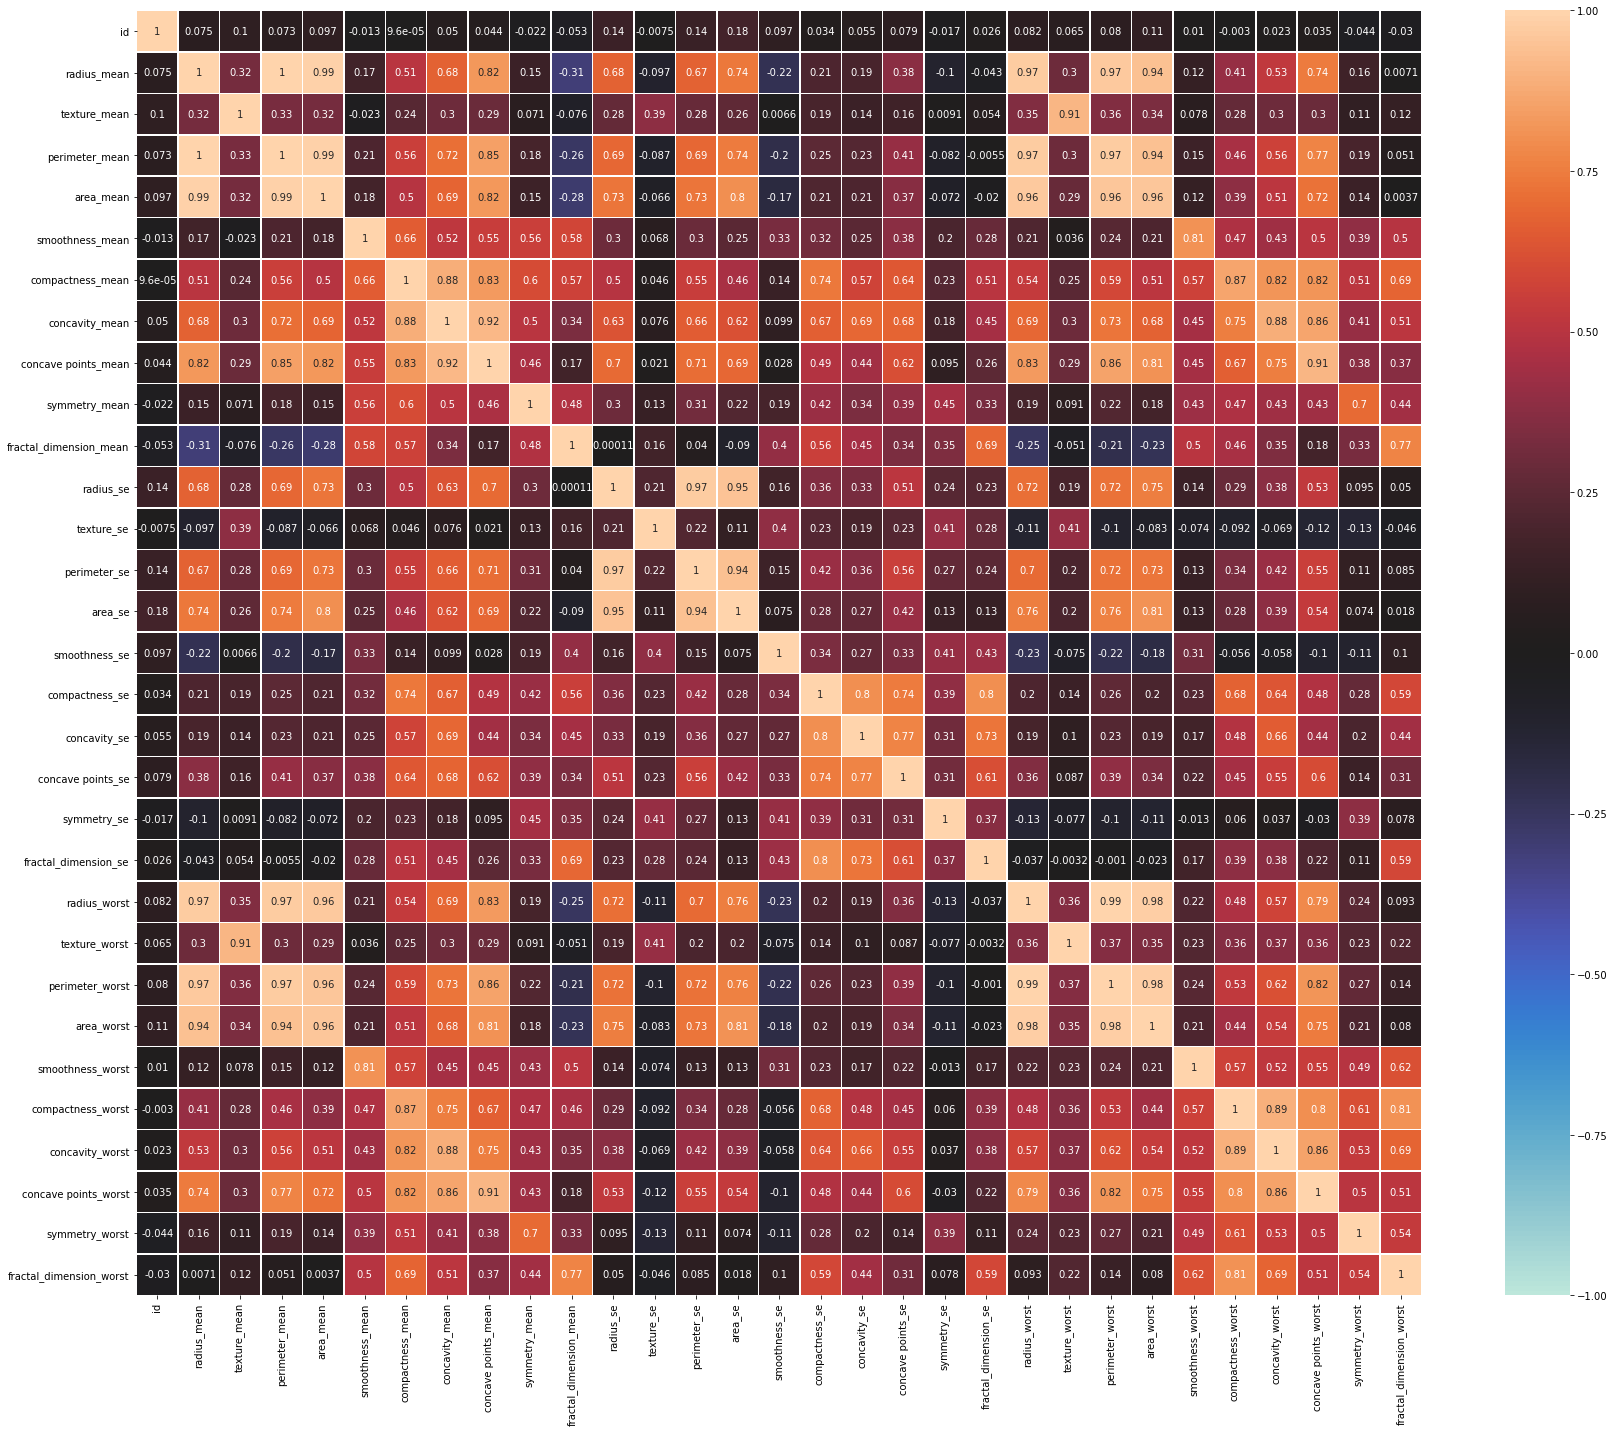

In [9]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,
            square=True, center=0, linewidths=.5)
plt.tight_layout()

#### Using heatmap we can see that there are many features having colinearity. let's use PCA to pick top components which can explain maximum variance.

In [10]:
# First let's scale the data 
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].replace({'M':1,'B':0})

In [11]:
X_scaled = scale.fit_transform(X)
X_scaled

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
# Using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.18319983e+00,  1.97127137e+00, -1.17162471e+00, ...,
        -3.39113949e-02,  4.55717832e-02, -4.71657487e-02],
       [ 2.38329766e+00, -3.75345877e+00, -5.80228664e-01, ...,
         3.26298575e-02, -5.90208043e-03, -1.84483129e-03],
       [ 5.74247239e+00, -1.08035048e+00, -5.33087882e-01, ...,
         4.70218699e-02,  3.28969989e-03,  7.35346039e-04],
       ...,
       [ 1.25189010e+00, -1.89397674e+00,  5.34466848e-01, ...,
        -2.56758630e-03,  6.34033194e-03,  3.80807814e-03],
       [ 1.03650353e+01,  1.69639755e+00, -1.90741785e+00, ...,
        -6.80834660e-02, -8.43022898e-02, -2.37630430e-02],
       [-5.47826365e+00, -6.72788035e-01,  1.47716504e+00, ...,
        -9.51329032e-03, -6.10512178e-02, -1.94561856e-02]])

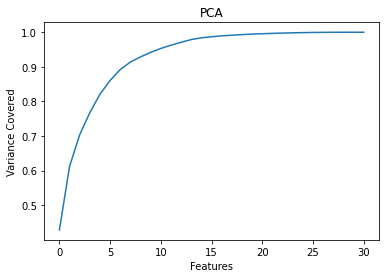

In [13]:
## plotting thest variance ratios to check which features are important for making prediction.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))   # cumsum : cumulative sum of the elements
plt.xlabel('Features')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

As we can see that only first 15 features are adding variance in our dataset and only those are important for training our model. So let's select only first 15 features.

In [14]:
pca = PCA(n_components=15)
new_comp = pca.fit_transform(X_scaled)

In [15]:
reduced_dataset = pd.DataFrame(new_comp)

In [16]:
reduced_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180529,-0.231610,-0.090396,-0.875268,0.264551,-0.859595,0.104563,-0.690065
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426916,-0.659939,1.085345,0.810103,0.158546,-0.945861,-0.651364
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715209,-0.010713,-0.082305,0.426614,-0.603993,0.122953,-0.409016,0.014283
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287990,1.272638,-1.171376,-1.219464,-1.138545,1.003892,-0.925914,-0.494973
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629119,-0.166354,0.379517,0.649893,-0.109990,0.387836,-0.539592


## Train-Test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_dataset, y, test_size=0.25, random_state=52)

## Training the model using Multiclass Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### making Predictions

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## model Evaluation

In [21]:
# Checking precision, recall and f1 score of model

from sklearn.metrics import  confusion_matrix,classification_report,precision_recall_curve

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.98      0.98      0.98        50

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [23]:
# Generating confusion matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
true_positive = cm[0, 0]
true_negetive = cm[1, 1]

print ('True Positive  >', cm[0, 0])
print ('False Positive >', cm[0, 1])
print ('False Negetive >', cm[1, 0])
print ('True Negetive  >', cm[1, 1])

True Positive  > 92
False Positive > 1
False Negetive > 1
True Negetive  > 49


In [25]:
# heatmap of confusion matrix

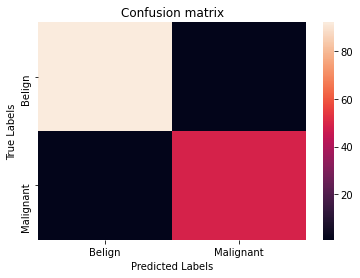

In [26]:
ax=plt.subplot()
sns.heatmap(cm)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Belign','Malignant'])
ax.yaxis.set_ticklabels(['Belign','Malignant'])
plt.show()

## Accuracy

In [27]:
print(f'accurcay = {round((true_positive+true_negetive) / len(y_pred) * 100, 2)}%')

accurcay = 98.6%
